### Logistic Regression on Student Performance Dataset

#### Step 1: Load Dataset

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load Dataset
df = pd.read_csv(r"E:\Datasets\student_performance.csv", delimiter = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


- Target - We transform G3 col into a binary col
- G3 >= 10 --> Pass(1)
- G3 < 10 --> Fail(0)

#### Step 2: Data Preprocessing

In [3]:
df.shape

(395, 33)

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


- G1 - Grade for perios 1
- G2 - Grade for period 2
- G3 - Final Grade (target) 
- If G3 >= 10 ---> Pass(1)
-  If G3 < 10 ---> Fail(0)

#### Step 3. Plot the target

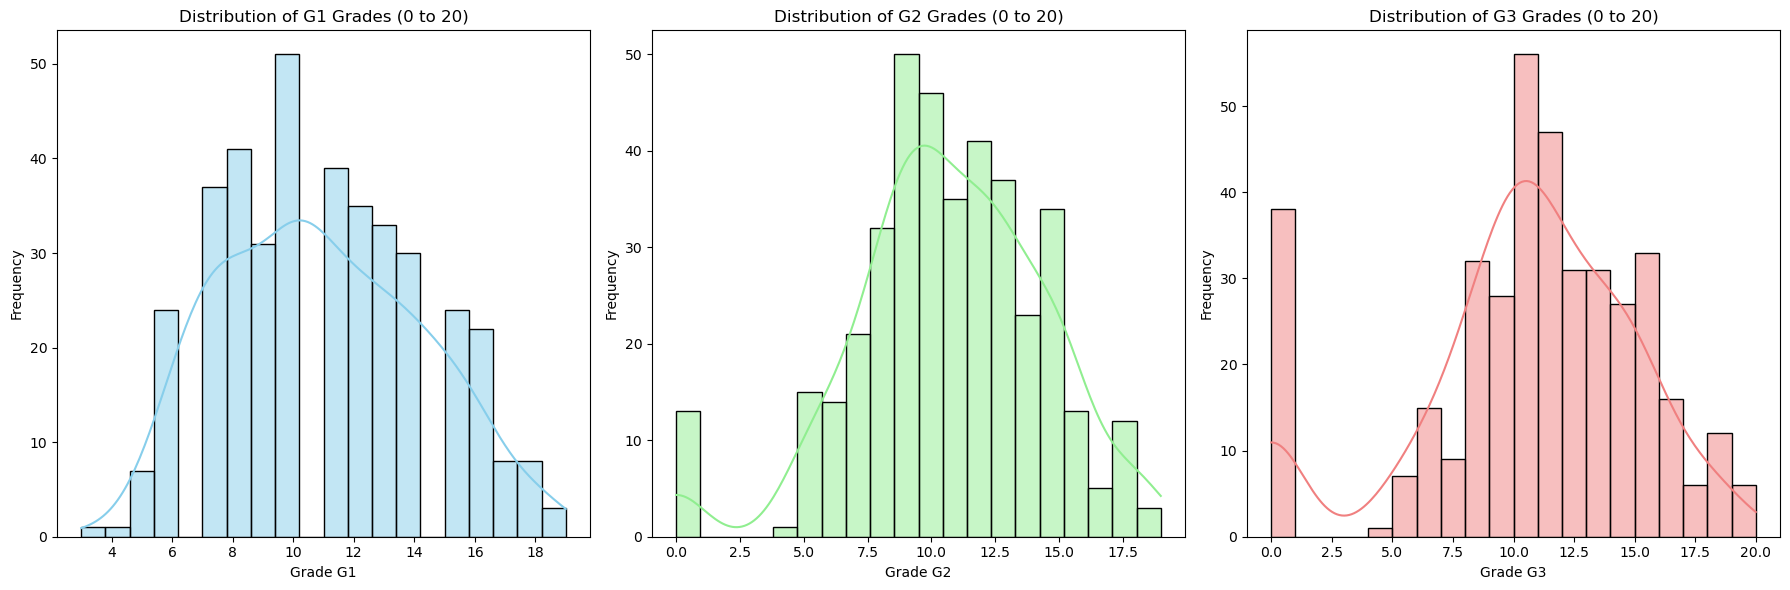

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
sns.histplot(df['G1'], kde=True, bins=20, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of G1 Grades (0 to 20)')
axes[0].set_xlabel('Grade G1')
axes[0].set_ylabel('Frequency')

sns.histplot(df['G2'], kde=True, bins=20, color='lightgreen', ax=axes[1])
axes[1].set_title('Distribution of G2 Grades (0 to 20)')
axes[1].set_xlabel('Grade G2')
axes[1].set_ylabel('Frequency')

sns.histplot(df['G3'], kde=True, bins=20, color='lightcoral', ax=axes[2])
axes[2].set_title('Distribution of G3 Grades (0 to 20)')
axes[2].set_xlabel('Grade G3')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
pd.set_option("display.max_columns", 35)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


#### Step 4. Check duplicates

In [7]:
duplicates = df.duplicated()
df[duplicates].sum()

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

#### Step 5: Handle missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

5. Convert Final grade G3 into binary 'pass' or 'fail'

In [9]:
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

#### Step 6. Drop unwanted columns

In [10]:
df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

In [11]:
df.drop(['school', 'address', 'age', 'sex'], axis=1, inplace=True)

#### Step 7. Encode Categorical Features

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [13]:
df.head()

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,0
1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,0
2,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1
3,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,1
4,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,1


#### Step 8. Feature Engineering and Outlier Handling

In [14]:
df = df[df['absences'] < 30]

In [15]:
df.shape

(389, 27)

In [16]:
means = df.mean()
std_devs = df.std()
z_scores = (df - means) / std_devs
threshold = 4

outliers = df[(z_scores.abs() > threshold).any(axis=1)]

print(f"Number of outliers: {len(outliers)}")

Number of outliers: 20


In [17]:
# checking outliers
def outlier_detection(outliers):
    if not outliers.empty:
        print("Indices of outliers:")
        print(outliers.index.tolist())
    else:
        print("No Outliers detected.")
outlier_detection(outliers)

Indices of outliers:
[78, 127, 148, 150, 153, 160, 163, 164, 165, 166, 205, 239, 247, 250, 252, 269, 311, 352, 361, 371]


In [18]:
# Handling Outliers - remove rows with outliers
df_no_outliers = df[(z_scores.abs() <= threshold).all(axis=1)]
df_no_outliers.shape

(369, 27)

#### Step 9: Split into train and test sets

In [19]:
X = df_no_outliers.drop(['pass'], axis=1)
y = df_no_outliers['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

#### Step 10: Scale Features

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Step 11: Train the Model

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Step 12: Evaluate the Model

In [22]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7162162162162162


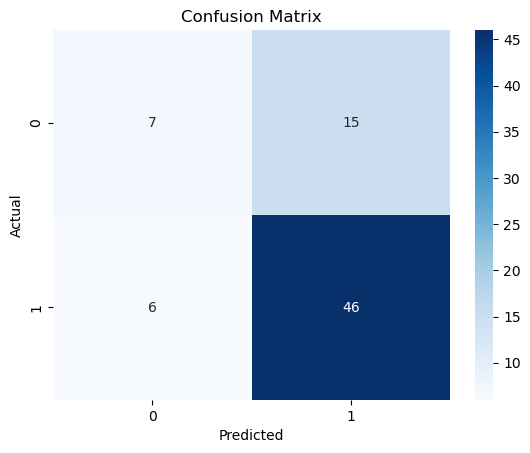

In [23]:
# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# 3. Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report: \n", cr)

Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.32      0.40        22
           1       0.75      0.88      0.81        52

    accuracy                           0.72        74
   macro avg       0.65      0.60      0.61        74
weighted avg       0.69      0.72      0.69        74

